In [34]:
# data analysis libraries
import pandas as pd
import numpy as np
import random as rnd

# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# cModel design
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
import missingno as msno

In [2]:
#Loading the Dataset
df = pd.read_csv("diabetes.csv")

In [3]:
#analysing the features in the dataset
print(df.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<AxesSubplot:>

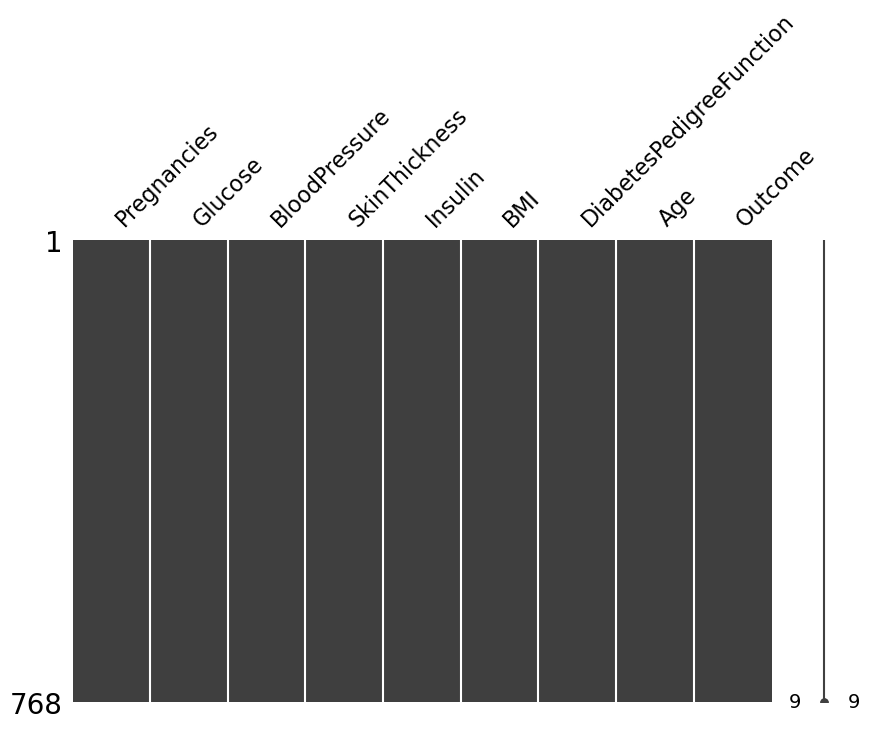

In [4]:
print(df.isna().sum())
msno.matrix(df=df,figsize=(10,6))

In [5]:
#checking the datatype of all the columns(features)
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Creating a function to get the percentage of missing values in the columns

def missing_per(var):
    print('Percentage:',round((zero_values_columns[zero_values_columns[var] == 0].shape[0])/(zero_values_columns.shape[0])*100,ndigits=2))
    print('No. of missing values:',zero_values_columns[zero_values_columns[var] == 0].shape[0],'\n')

In [7]:
zero_values_columns = df.iloc[:,1:6]
zero_values_columns.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


Percentage: 0.65
No. of missing values: 5 



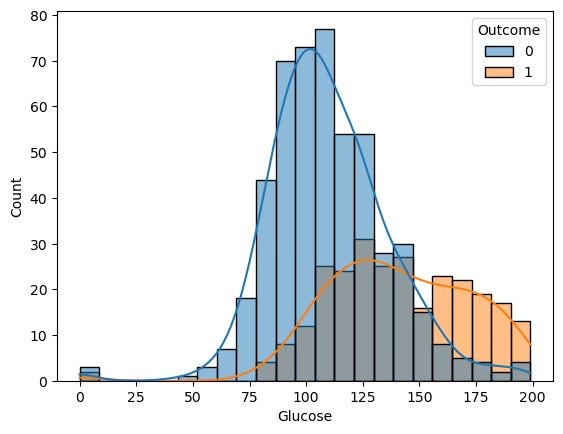

In [8]:
sns.histplot(x='Glucose',data=zero_values_columns,kde=True,hue=df['Outcome'])
missing_per('Glucose')

Percentage: 4.56
No. of missing values: 35 



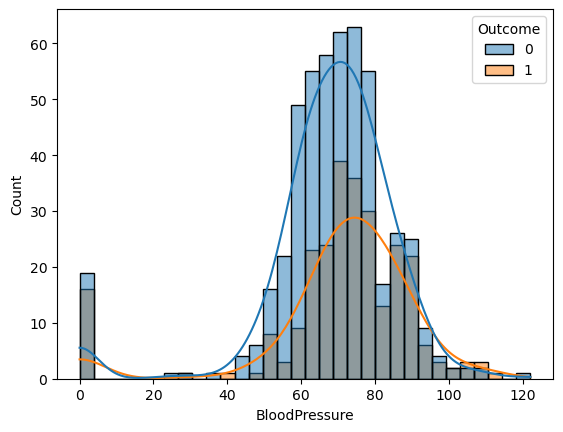

In [9]:
sns.histplot(x='BloodPressure',data=zero_values_columns,kde='True',color='green',hue=df['Outcome'])
missing_per('BloodPressure')

Percentage: 29.56
No. of missing values: 227 



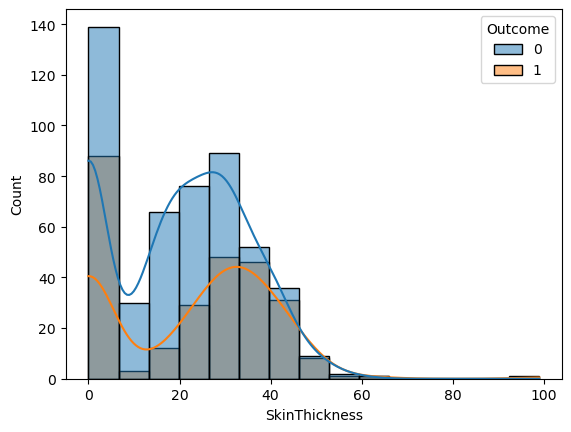

In [10]:
sns.histplot(x='SkinThickness',data=zero_values_columns,kde=True,color='k',hue=df['Outcome'])
missing_per('SkinThickness')

Percentage: 48.7
No. of missing values: 374 



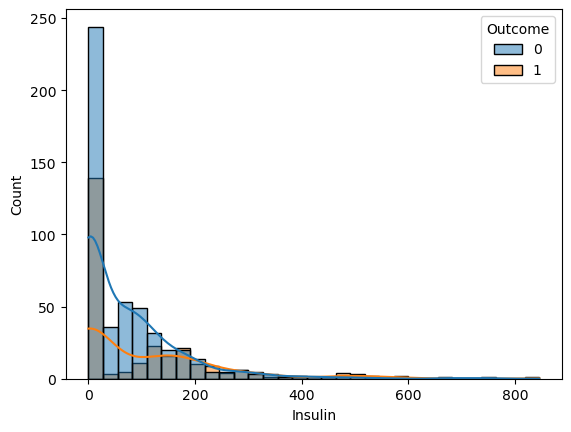

In [11]:
sns.histplot(x='Insulin',data=zero_values_columns,kde=True,color='purple',hue=df['Outcome'])
missing_per('Insulin')

Percentage: 1.43
No. of missing values: 11 



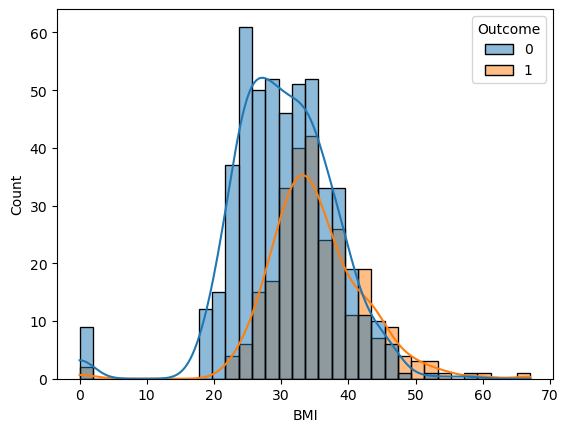

In [12]:
sns.histplot(x='BMI',data=zero_values_columns,kde=True,color='darkgreen',hue=df['Outcome'])
missing_per('BMI')

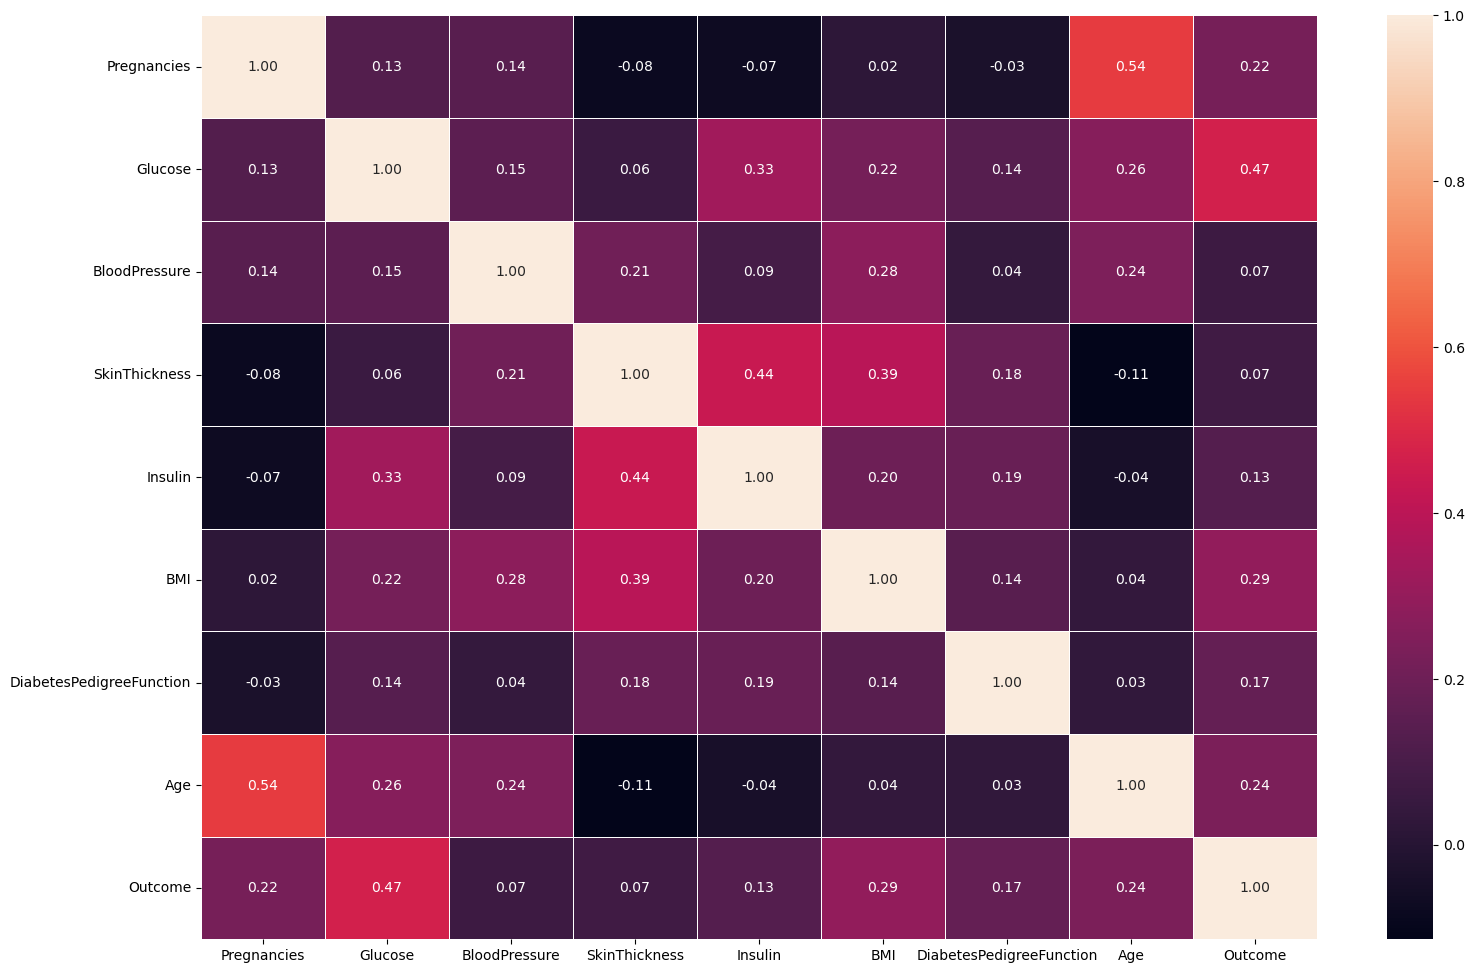

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),fmt='.2f',annot=True,linecolor='white',linewidths=0.5)
plt.show()

In [19]:
#specifying the independent and dependent variables
X = df.drop('Outcome',axis=1)#the faeture set includes all the columns except the price, so we drop it
y = df['Outcome'] #depenedent variabele as the aim of the model is to predict the price

In [22]:
print(f'x: {X.shape}\ny: {y.shape}')

x: (768, 8)
y: (768,)


In [24]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
rus = RandomUnderSampler()
rus.fit(X,y)
X_resampled,y_resampled = rus.fit_resample(X,y)
sX_resampled = mmscaler.fit_transform(X_resampled)

NameError: name 'mmscaler' is not defined

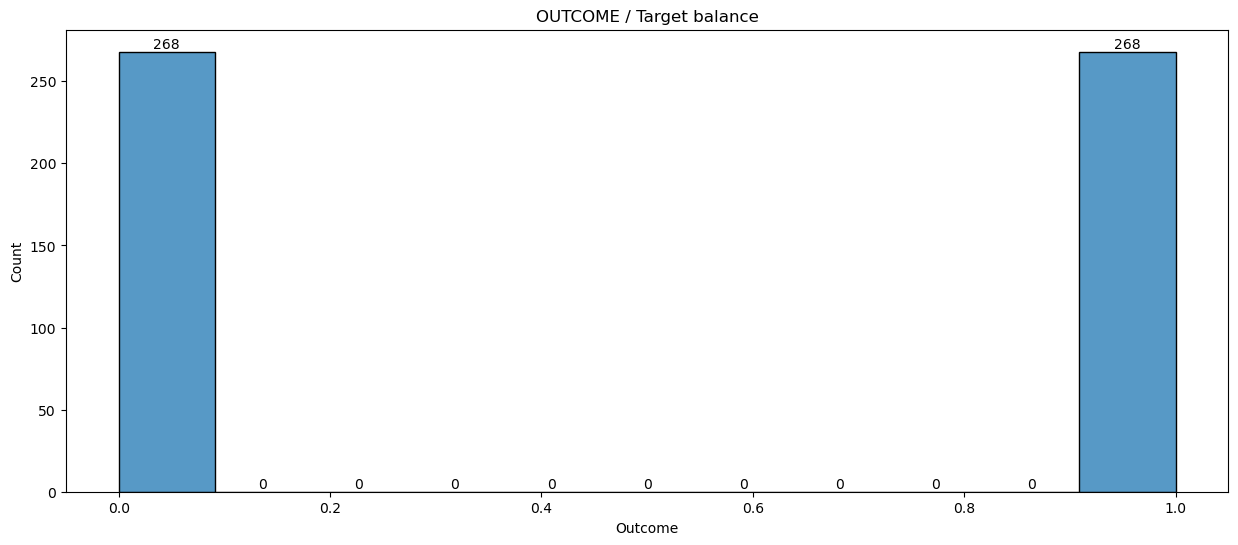

In [25]:
plt.figure(figsize=(15,6))
ax=sns.histplot(data=y_resampled,stat='count')
for i in ax.containers:
    ax.bar_label(i)
plt.title('OUTCOME / Target balance')
plt.show()

<AxesSubplot:>

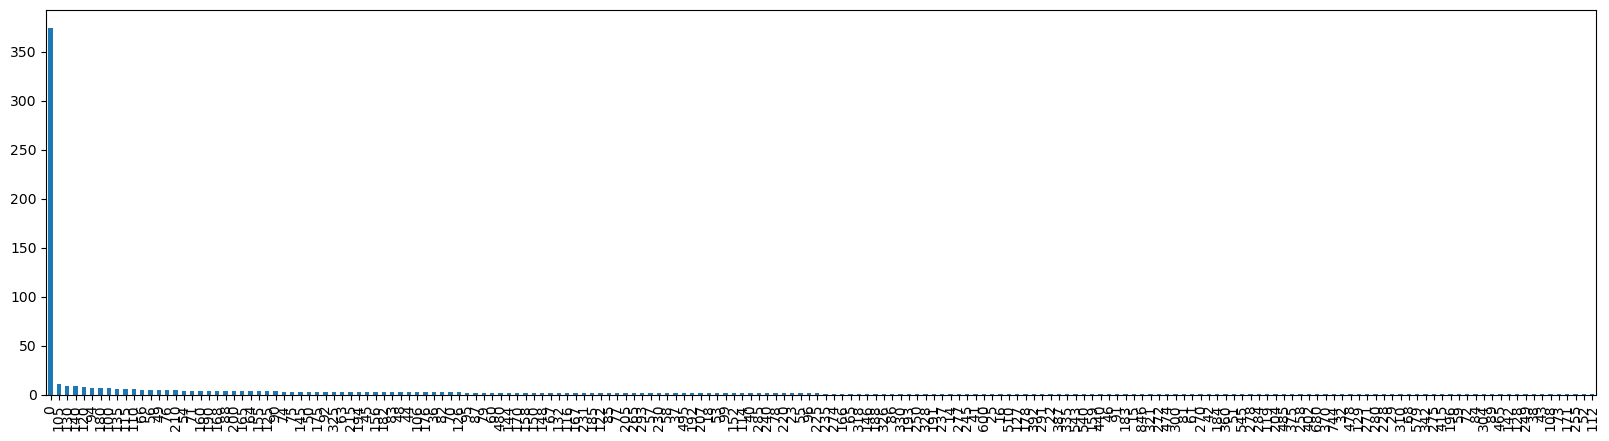

In [17]:
plt.figure(figsize=(20,5))
df['Insulin'].value_counts().plot(kind='bar')

In [26]:
#splitting the dataset into train and validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101) #test size is 20% of the total dataset

In [27]:
#Data normalization/scaling
scaler = MinMaxScaler()
# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [30]:
model = Sequential()#from keras and tnsorflow libraries
# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
#lets visaulaize the model
print(model)

In [43]:
# predict the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.35)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)#the epochs are the number of traing iterations

Train on 614 samples, validate on 154 samples
Epoch 1/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0953 - val_loss: 0.1869
Epoch 2/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0949 - val_loss: 0.1872
Epoch 3/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0946 - val_loss: 0.1895
Epoch 4/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0950 - val_loss: 0.1887
Epoch 5/400
614/614 [==============================] - 0s 26us/sample - loss: 0.0948 - val_loss: 0.1876
Epoch 6/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0941 - val_loss: 0.1916
Epoch 7/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0941 - val_loss: 0.1881
Epoch 8/400
614/614 [==============================] - 0s 11us/sample - loss: 0.0939 - val_loss: 0.1905
Epoch 9/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0934 - val_loss: 0.1883
Epoch 10/400
614/614 [==

614/614 [==============================] - 0s 25us/sample - loss: 0.0879 - val_loss: 0.2005
Epoch 80/400
614/614 [==============================] - 0s 11us/sample - loss: 0.0880 - val_loss: 0.1994
Epoch 81/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0872 - val_loss: 0.2019
Epoch 82/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0883 - val_loss: 0.2001
Epoch 83/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0875 - val_loss: 0.2004
Epoch 84/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0885 - val_loss: 0.2001
Epoch 85/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0886 - val_loss: 0.1989
Epoch 86/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0878 - val_loss: 0.2010
Epoch 87/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0870 - val_loss: 0.2017
Epoch 88/400
614/614 [==============================] - 0s 25us/sample - los

614/614 [==============================] - 0s 25us/sample - loss: 0.0822 - val_loss: 0.2089
Epoch 158/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0814 - val_loss: 0.2104
Epoch 159/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0826 - val_loss: 0.2103
Epoch 160/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0819 - val_loss: 0.2098
Epoch 161/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0821 - val_loss: 0.2091
Epoch 162/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0824 - val_loss: 0.2093
Epoch 163/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0818 - val_loss: 0.2130
Epoch 164/400
614/614 [==============================] - 0s 36us/sample - loss: 0.0825 - val_loss: 0.2083
Epoch 165/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0825 - val_loss: 0.2105
Epoch 166/400
614/614 [==============================] - 0s 26us/sampl

614/614 [==============================] - 0s 0s/sample - loss: 0.0759 - val_loss: 0.2192
Epoch 236/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0766 - val_loss: 0.2154
Epoch 237/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0765 - val_loss: 0.2184
Epoch 238/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0762 - val_loss: 0.2174
Epoch 239/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0762 - val_loss: 0.2216
Epoch 240/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0767 - val_loss: 0.2190
Epoch 241/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0777 - val_loss: 0.2224
Epoch 242/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0765 - val_loss: 0.2150
Epoch 243/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0763 - val_loss: 0.2189
Epoch 244/400
614/614 [==============================] - 0s 11us/sampl

614/614 [==============================] - 0s 0s/sample - loss: 0.0724 - val_loss: 0.2224
Epoch 314/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0723 - val_loss: 0.2197
Epoch 315/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0729 - val_loss: 0.2214
Epoch 316/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0728 - val_loss: 0.2221
Epoch 317/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0719 - val_loss: 0.2204
Epoch 318/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0719 - val_loss: 0.2204
Epoch 319/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0722 - val_loss: 0.2211
Epoch 320/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0728 - val_loss: 0.2206
Epoch 321/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0720 - val_loss: 0.2215
Epoch 322/400
614/614 [==============================] - 0s 36us/sampl

614/614 [==============================] - 0s 0s/sample - loss: 0.0676 - val_loss: 0.2252
Epoch 392/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0684 - val_loss: 0.2257
Epoch 393/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0690 - val_loss: 0.2235
Epoch 394/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0676 - val_loss: 0.2253
Epoch 395/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0680 - val_loss: 0.2249
Epoch 396/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0692 - val_loss: 0.2281
Epoch 397/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0692 - val_loss: 0.2243
Epoch 398/400
614/614 [==============================] - 0s 25us/sample - loss: 0.0681 - val_loss: 0.2282
Epoch 399/400
614/614 [==============================] - 0s 0s/sample - loss: 0.0686 - val_loss: 0.2238
Epoch 400/400
614/614 [==============================] - 0s 0s/sample 

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       103
           1       0.57      0.71      0.63        51

    accuracy                           0.73       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.75      0.73      0.73       154



precision score 0.706
recall score 0.571
f1 score 0.632
accuracy score 0.727


<AxesSubplot:>

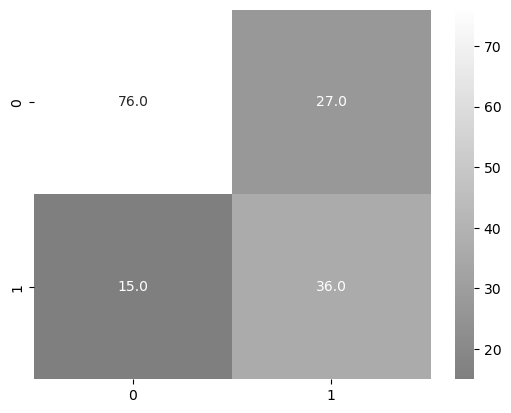

In [46]:
# plot confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print('precision score',round(precision_score(y_pred,y_test),ndigits=3))
print('recall score',round(recall_score(y_pred,y_test),ndigits=3))
print('f1 score',round(f1_score(y_pred,y_test),ndigits=3))
print('accuracy score',round(accuracy_score(y_pred,y_test),ndigits=3))

conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)

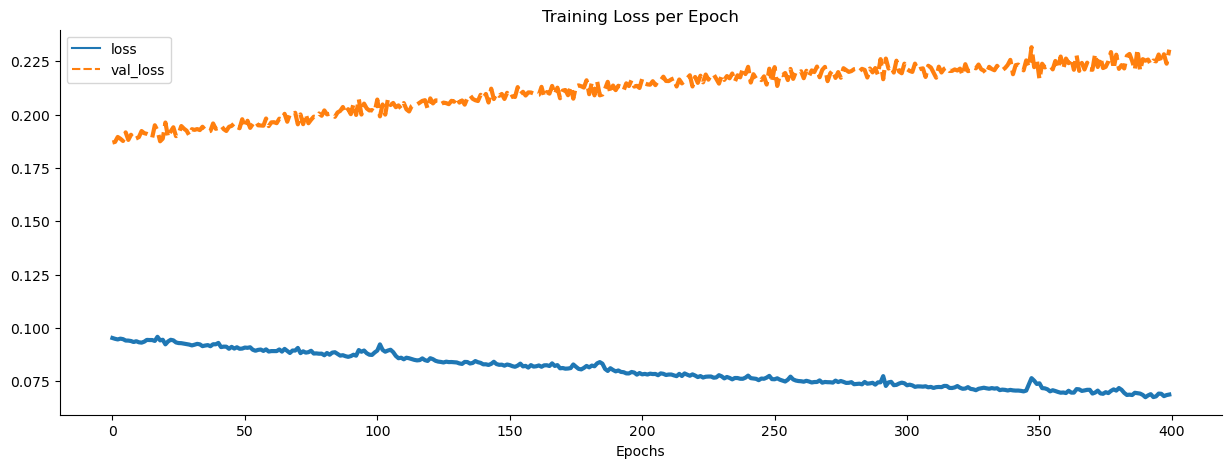

In [47]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [48]:
# predictions on the test set
predictions = model.predict(X_test)
print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print('\n\nDescriptive Statistics:\n',df['Outcome'].describe())

MAE:  0.3376705156361031
MSE:  0.23038284995589214
RMSE:  0.4799821350382659
Variance Regression Score:  -0.02866648053165477


Descriptive Statistics:
 count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

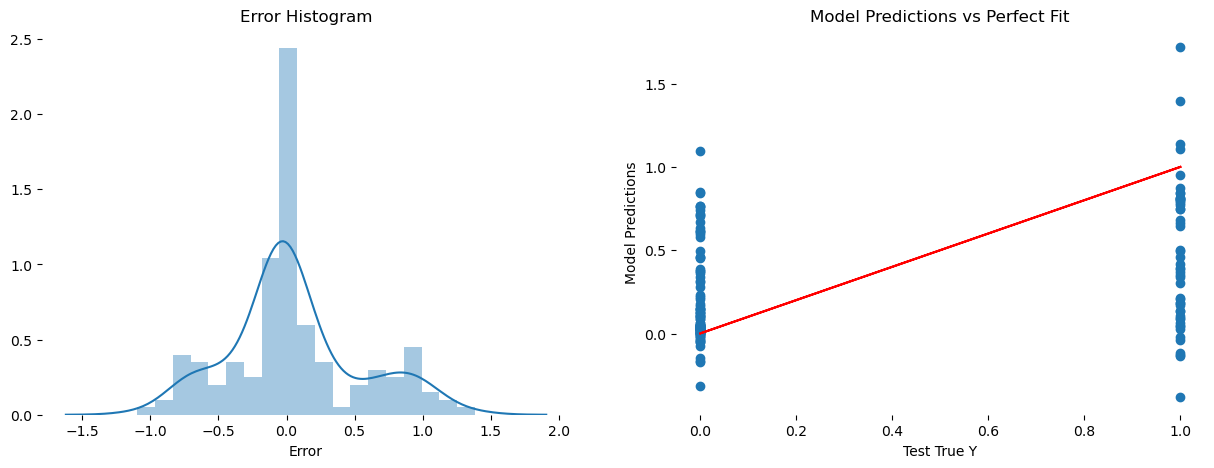

In [49]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
# Our model predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
errors = y_test.values.reshape(154, 1) - predictions
sns.distplot(errors, ax=axes[0])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [50]:
## fueatures of new house
single_house = df.drop('Outcome',axis=1).iloc[0]
print(f'Symptoms:\n{single_house}')
# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 8))
# run the model and get the price prediction
print('\nPrediction Outcome:',model.predict(single_house)[0,0].round())
# original price
print('\nOriginal Outcome:',df.iloc[0]['Outcome'])

Symptoms:
Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Name: 0, dtype: float64

Prediction Outcome: 1.0

Original Outcome: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
